In [184]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, on='city', how='left')
# Display the data table for preview

combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

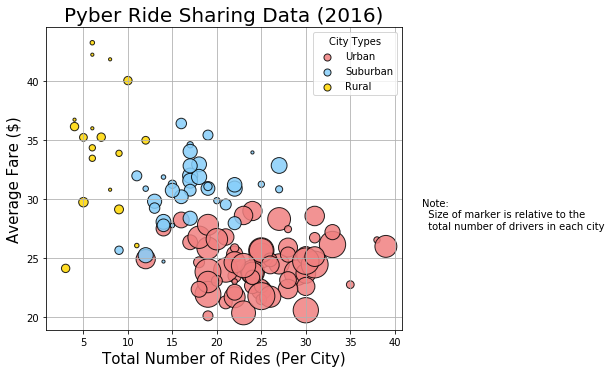

In [221]:
# Obtain the x and y coordinates for each of the three city types
grouped = combined_df.groupby(['type','city'])
summary_df = pd.DataFrame({'Average Fare': grouped.fare.mean(),
                          'Total Rides': grouped.ride_id.nunique(),
                          'Total Drivers': grouped.driver_count.mean()})
summary_df.reset_index(inplace=True)

urban_df = summary_df.loc[summary_df.type=='Urban']
suburban_df = summary_df.loc[summary_df.type=='Suburban']
rural_df = summary_df.loc[summary_df.type=='Rural']

# Build the scatter plots for each city types
fig, ax = plt.subplots(figsize=(9,7))
plt.subplots_adjust(left=0.1, right=0.65, bottom=0.3, top=0.9)
ax.scatter(urban_df['Total Rides'], urban_df['Average Fare'], c='lightcoral', s=10*(urban_df['Total Drivers'].values), edgecolor='k', alpha=0.85, label='Urban')
ax.scatter(suburban_df['Total Rides'], suburban_df['Average Fare'], c='lightskyblue', s=10*(suburban_df['Total Drivers'].values), edgecolor='k', alpha=0.85, label='Suburban')
ax.scatter(rural_df['Total Rides'], rural_df['Average Fare'], c='gold', s=10*(rural_df['Total Drivers'].values), edgecolor='k', alpha=0.85, label='Rural')

# Incorporate the other graph properties
ax.grid()
ax.set_ylabel('Average Fare ($)', fontsize=15)
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=15)
ax.set_title('Pyber Ride Sharing Data (2016)', fontsize=20)

# Create a legend
lgnd = ax.legend(loc="upper right", scatterpoints=1, fontsize=10, title='City Types')

# Resize legend markers to all the same size
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.figtext(.68, 0.5, s="Note: \n  Size of marker is relative to the\n  total number of drivers in each city")

# Save Figure
#plt.tight_layout()
plt.savefig("RideDataBubble.png")

# Show Figure
plt.show()

## Total Fares by City Type

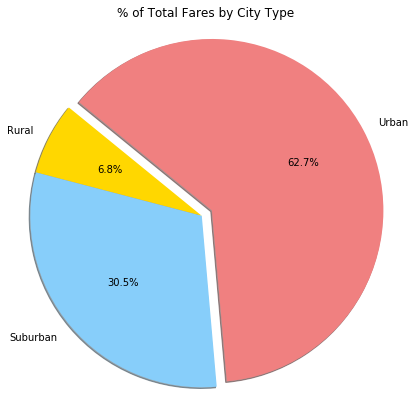

In [192]:
# Calculate Fare Percents
summary_df.head()
rural_fare = combined_df.fare.loc[combined_df.type=='Rural'].sum()
suburban_fare = combined_df.fare.loc[combined_df.type=='Suburban'].sum()
urban_fare = combined_df.fare.loc[combined_df.type=='Urban'].sum()

labels = ['Urban', 'Rural', 'Suburban']
data = [urban_fare, rural_fare, suburban_fare]

# Build Pie Chart
fig, ax = plt.subplots()
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = [0.2, 0, 0]

ax.pie(data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=275, radius=3)

ax.axis('equal')
ax.set_title('% of Total Fares by City Type')

# Increase plot size
fig = plt.gcf()
fig.set_size_inches(7,7)

# Save Figure
plt.savefig("FaresCiyType.png")

# Display Figure
plt.show()

## Total Rides by City Type

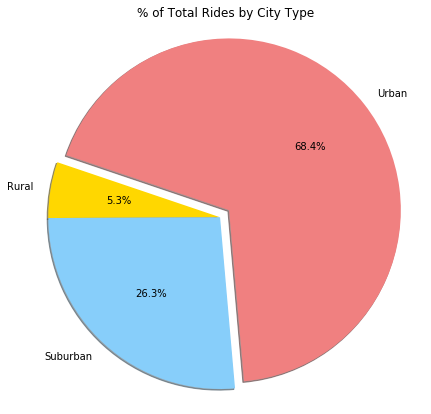

In [191]:
# Calculate Type Percents
summary_df.head()
rural_rides = summary_df['Total Rides'].loc[summary_df.type=='Rural'].sum()
suburban_rides = summary_df['Total Rides'].loc[summary_df.type=='Suburban'].sum()
urban_rides = summary_df['Total Rides'].loc[summary_df.type=='Urban'].sum()

labels = ['Urban', 'Rural', 'Suburban']
data = [urban_rides, rural_rides, suburban_rides]

# Build Pie Chart
fig, ax = plt.subplots()
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = [0.2, 0, 0]

ax.pie(data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=275, radius=3)

ax.axis('equal')
ax.set_title('% of Total Rides by City Type')

# Increase plot size
fig = plt.gcf()
fig.set_size_inches(7,7)

# Save Figure
plt.savefig("RidesCiyType.png")

# Display Figure
plt.show()

## Total Drivers by City Type

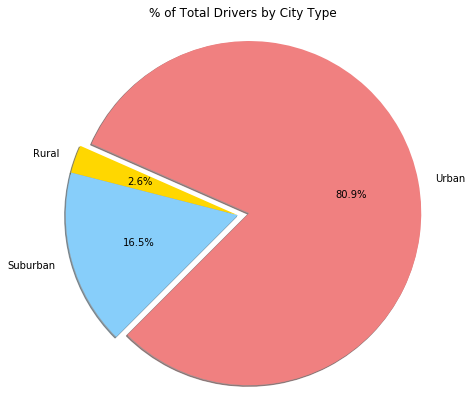

In [190]:
# Calculate Driver Percents
summary_df.head()
rural_driver = city_df.driver_count.loc[city_df.type=='Rural'].sum()
suburban_driver = city_df.driver_count.loc[city_df.type=='Suburban'].sum()
urban_driver = city_df.driver_count.loc[city_df.type=='Urban'].sum()

labels = ['Urban', 'Rural', 'Suburban']
data = [urban_driver, rural_driver, suburban_driver]

# Build Pie Chart
fig, ax = plt.subplots()
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = [0.2, 0, 0]

ax.pie(data, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=225, radius=3)

ax.axis('equal')
ax.set_title('% of Total Drivers by City Type')

# Increase plot size
fig = plt.gcf()
fig.set_size_inches(7,7)

# Save Figure
plt.savefig("DriversCiyType.png")

# Display Figure
plt.show()